In [13]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from src import fonctions

In [14]:
# Chemins du projet
DATA_ROOT = "data/"
MODELS_ROOT = "saved_models/"
TRAINING_PATH = DATA_ROOT + "cifar_lite/train"
TESTING_PATH = DATA_ROOT + "cifar_lite/test"
CIFAR_LITE = DATA_ROOT + "cifar_lite"
# Autres paramètres

# num_classes =
epochs = 50
img_size = 32

In [16]:
# Afin d'optimiser les performances et de travailler avec moins de données nous décidons de diminuer les 100 catégories du fichier "cifar" en 10 catégories prises au hasard
fonctions.clean_lite(10, CIFAR_LITE)

Tout les fichiers nécessaires sont déjà présents! --> 'data\cifar_lite'


In [17]:
# Convertion des futurs images RBG en niveaux de gris (0 == noir, 255 == blanc)
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    # Choix de notre repertoire
    directory = TRAINING_PATH,
    # Nous convertissons les images de leur taille d'origine à notre target_size                  
    target_size = (img_size, img_size),
    # Nous definissons le class_mode sur "catégorical" indiquant que nous avons plusieurs classes (a à z) à prédire        
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    # Choix de notre repertoire
    directory = TESTING_PATH,
    # Nous convertissons les images de leur taille d'origine à notre target_size    
    target_size = (img_size,img_size),
    # Nous definissons le class_mode sur "catégorical" indiquant que nous avons plusieurs classes (a à z) à prédire
    class_mode = "categorical"
)

Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [19]:
# Récupération du modèle obtenu dans "étalonnage_modeles.ipynb"
model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(125, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

es_callback = EarlyStopping(monitor='val_loss', patience=3)
entrainement = model.fit_generator(train_generator, epochs = epochs, callbacks=[es_callback], validation_data = test_generator)

score = model.evaluate(train_generator, verbose=0)
print("Test de perte:", score[0])
print("Test de précision:", score[1])
print("")
print("Enregistrement du modèle...")
model.save(MODELS_ROOT + "model_cifar10.h5")
print("Modèle enregistré!")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       56375     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                80010     
Total params: 137,785
Trainable params: 137,785
Non-trainable params: 0
________________________________________________

ValueError: Error when checking target: expected dense_1 to have shape (10,) but got array with shape (3,)


Modèle chargé!


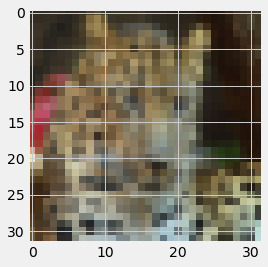


Roulement de tambour...
Prédictions :

leopard : 88.2 %
caterpillar : 4.28 %
bed : 2.52 %
turtle : 2.11 %
plate : 1.41 %
seal : 0.76 %
sweet_pepper : 0.28 %
streetcar : 0.24 %
palm_tree : 0.15 %
skyscraper : 0.06 %




In [15]:
# Visualisation de l'image
layer_outputs = [layer.output for layer in model.layers]
test_image = "src\images\leopard_ultra_bg.jpg"

# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_cifar10.h5","src\images\leopard_ultra_bg.jpg", CIFAR_LITE_10)


Modèle chargé!


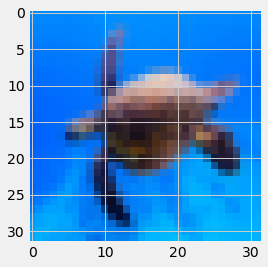


Roulement de tambour...
Prédictions :

turtle : 99.18 %
seal : 0.78 %
palm_tree : 0.02 %
skyscraper : 0.01 %
plate : 0.0 %
caterpillar : 0.0 %
bed : 0.0 %
leopard : 0.0 %
streetcar : 0.0 %
sweet_pepper : 0.0 %




In [17]:
fonctions.test_model("saved_models/model_cifar10.h5","src/images/tortue_qui_tue", CIFAR_LITE_10)


Modèle chargé!


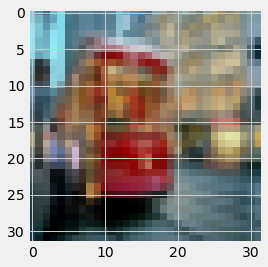


Roulement de tambour...
Prédictions :

streetcar : 87.0 %
bed : 6.9 %
sweet_pepper : 5.33 %
leopard : 0.44 %
seal : 0.13 %
skyscraper : 0.1 %
caterpillar : 0.07 %
plate : 0.01 %
palm_tree : 0.01 %
turtle : 0.01 %




In [21]:
fonctions.test_model("saved_models/model_cifar10.h5","src\images\streetcar.jpg", CIFAR_LITE_10)

Notre modèle fonctionne bien! :D 
Sur les 3 images testées venants de 10 catégories différentes (CIFAR_LITE_10) nos prédictions sont justes.  
Afin de tester toujours un peu plus notre modèle nous souhaitons maintenant intégrer une image sous forme de dessin!  
Nous allons importer une image du fameux "CRASH", l'opossum de l'âge de glace! XD


Modèle chargé!


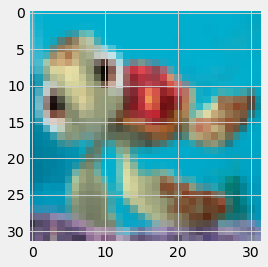


Roulement de tambour...
Prédictions :

seal : 78.81 %
turtle : 6.86 %
palm_tree : 4.55 %
sweet_pepper : 4.11 %
caterpillar : 1.8 %
streetcar : 1.25 %
skyscraper : 1.06 %
bed : 0.69 %
leopard : 0.6 %
plate : 0.27 %




In [22]:
# Nous testons maintenant notre modèle sur un dessin ( ici la tortue de Nemo)
fonctions.test_model("saved_models/model_cifar10.h5","src/images/tortue nemo.jpg", CIFAR_LITE_10)


Modèle chargé!


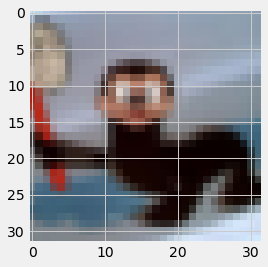


Roulement de tambour...
Prédictions :

seal : 39.95 %
streetcar : 37.76 %
bed : 21.26 %
turtle : 0.54 %
caterpillar : 0.31 %
palm_tree : 0.1 %
sweet_pepper : 0.05 %
leopard : 0.03 %
plate : 0.01 %
skyscraper : 0.0 %




In [23]:
# Nous testons maintenant notre modèle sur un dessin ( ici le "Salty the Seal")
fonctions.test_model("saved_models/model_cifar10.h5","src\images\saly-the-seal.jpg", CIFAR_LITE_10)

Nous constatons que notre modèle n'a pas été entrainé pour reconnaitre des dessins ou des animations.  
Celui-ci au contraire ne reconnait que des images réelles.  
Les deux dernières predictions sont donc mauvaises (sans grande surprise) (enfin entre temps la seconde est devenue un peu meilleure) :(